In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection  import  train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn import datasets
from sklearn.datasets import fetch_openml

In [2]:
# Load dataset
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

In [3]:
#Split training and testing data
x_train , x_test, Y_train, Y_test = train_test_split(mnist.data,mnist.target,test_size = 0.1)
y_train = np.array([int(Y_train[i]) for i in range(len(Y_train))])
y_test = np.array([int(Y_test[i]) for i in range(len(Y_test))])

In [4]:
# Implementing QDA
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy:  0.5381428571428571


Text(0.5, 1.0, 'Inbuilt Function')

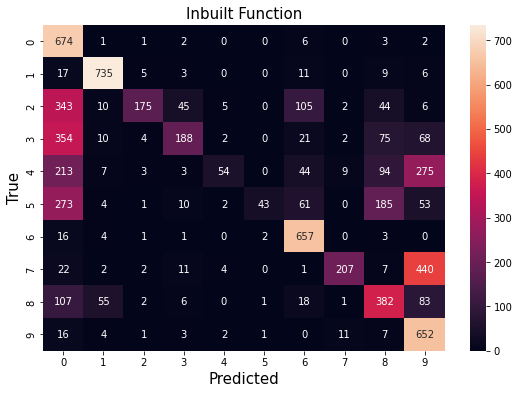

In [5]:
#Plot confusion matrix
plt.figure(figsize=[9,6])
sns.heatmap(confusion_matrix( y_test,y_pred),annot=True, fmt='.4g')
plt.ylabel('True',fontsize=15)
plt.xlabel('Predicted',fontsize=15)
plt.title('Inbuilt Function',fontsize=15)

In [22]:
# Adding noise to remove the collinearity
for i in range(len(x_train)):
  x_train[i] = x_train[i] + np.random.rand(1,len(x_train[i]))*(1**-10)


In [23]:
# Implementing QDA
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.8408571428571429


In [13]:
def qda(x,mu,pi,logdet,sigma_inverse):
  numerator = -np.inf
  y = 0
  for i in range(10):
    temp_numerator = -0.5*(np.dot(np.dot((x-mu[i]).T,sigma_inverse[i]),x-mu[i])) + np.log(pi[i]) - 0.5*logdet[i]
    if temp_numerator>numerator:
      numerator = temp_numerator
      y=i
  return y

In [24]:
#Calculate necessary values
pi=[]
mu=[]
det = []
sigma_inverse = [[] for i in range(10)]
yy = [np.where(y_train==i) for i in range(10)]
for i in range(10):
    x = x_train[yy[i]]
    pi.append(np.size(yy[i])/np.size(y_train))
    mu.append(np.mean(x,axis=0))
    sigma_i = np.cov(np.array(x), rowvar = False) 
    det.append(np.linalg.slogdet(sigma_i)[1]) #slogdet returns (det,log(det))
    sigma_inverse[i] = np.linalg.pinv(sigma_i)

In [25]:
#Prediction
y_pred_qda = []
for x in x_test:
  y_pred_qda.append(qda(x,mu,pi,det,sigma_inverse))
print('Accuracy of our function: ',accuracy_score(y_test,y_pred_qda))

Accuracy of our function:  0.8408571428571429


Text(0.5, 1.0, 'Our implementation')

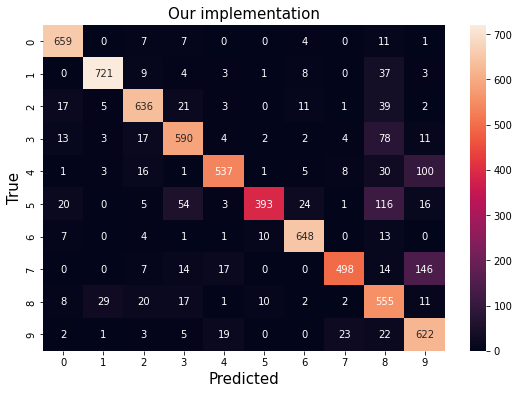

In [18]:
#Plot confusion matrix of our function
plt.figure(figsize=[9,6])
sns.heatmap(confusion_matrix( y_test,y_pred_qda),annot=True, fmt='0.4g')
plt.ylabel('True',fontsize=15)
plt.xlabel('Predicted',fontsize=15)
plt.title('Our implementation',fontsize=15)